# Lab 6: Azure AI Services

Azure AI services, help developers and organizations rapidly create intelligent, cutting-edge, market-ready, and responsible applications with prebuilt and customizable APIs and models. 

### Exercise overview

In this exercise, you'll learn how to use Azure AI services native endpoints in Fabric to enrich your data with prebuilt AI models without any prerequisite. The scenario is to use SynapseML integration with Azure AI Services to leverage Azure AI Translator and Text Analytics services to perform different tasks such as language translation and sentiment analysis on customer reviews and feedback. Moreover, you will learn how to use SynapseML and LangChain to build an LLM model that categorizes customer reviews and feedback into major themes that influenced customers' decision to leave the bank.

The main steps in this notebook are:

1. Import and Install reuired libraries
2. Load the data and perform exploratory data analysis
3. Use prebuilt Azure AI models in Fabric for translation and sentiment analysis
4. Leverage SynapseML and LangChain to create an LLM model to categorize customer feedback
5. Use SynapseML and OpenAI Chat Completion to perform Q&A on the DataFrame

### Helpful links
- [SynapseML in Microsoft Fabric](https://learn.microsoft.com/en-us/fabric/data-science/ai-services/ai-services-overview)

## Step 1: Setup your notebook

### Select Lakehouse

First, add the Lakehouse you created from the prior lab exercise.

<br>

![image-alt-text](https://synapseaisolutionsa.blob.core.windows.net/public/Fabric-Conference/add-lakehouse.png)

## Step 2: Install and import required libraries

Before we move forward with sentiment analysis of customer reviews, it is imperative to first install and import the essential libraries from Spark and SynapseML.

In [1]:
%pip install openai==0.28.1 | grep -v 'already satisfied'

StatementMeta(, , -1, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 0.27.8
    Not uninstalling openai at /home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages, outside environment /nfs4/pyenv-e8c7d2ed-8bb9-4409-a82c-1047dfca9c43
    Can't uninstall 'openai'. No files were found to uninstall.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [2]:
%pip install openai langchain==0.0.331 | grep -v 'already satisfied'

StatementMeta(, , -1, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 21.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [3]:
%pip install wordcloud textblob

StatementMeta(, , -1, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 102.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



> [!IMPORTANT]
> **Run the following cell in order to install the required packages for Copilot.**

In [4]:
%pip install https://aka.ms/chat_magics-0.0.0-py3-none-any.whl
%load_ext chat_magics

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 26, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 131.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.8/496.8 kB 120.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.4/699.4 kB 132.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 114.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 163.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━

### **Chat_magic commands**

* Using installed DSCopilot package.
* Service: fabric
* Model: gpt-35-turbo-16k




#### **AI Processor Disclaimer**


#### Data Privacy and Security

Chat-magics is powered by Azure OpenAI Service and is subject to the supplemental terms of use for
[Microsoft Azure Previews](https://azure.microsoft.com/en-us/support/legal/preview-supplemental-terms/).
Azure OpenAI is fully controlled by Microsoft.

In order to generate a response, chat-magics uses (a) your prompt or input and, when appropriate,
(b) additional data that is retrieved through the grounding process to provide more relevant,
contextual responses. This information is sent to Azure OpenAI, where it is processed and an
output is generated. Therefore, data processed by Azure OpenAI can include:

- Your prompt or input
- Grounding data
- Chat-magics response or output

Your Data:

- Is not used to train models.
- Is not available to other customers.
- Is stored for up to 30 days and may be reviewed by Microsoft employees for abuse monitoring.

Here is your current privacy configuration:  
* You ARE sharing previous messages sent to and replies from the LLM.  
* You ARE sharing the contents of cells that you have executed.  
* You ARE sharing the outputs of cells that you have executed.  
* You ARE sharing the schemas of data sources in your notebook.  
* You ARE sharing sample data from data sources in your notebook.  
* You ARE sharing schemas from external data sources.  
* You ARE automatically scanning for external data sources.  


Consider what sharing settings are appropriate when working with sensitive or confidential data. You can change your sharing settings at any time by using the command: %set\_sharing\_level




### **Usage**
Use the `%chat_magics` command to display this help message.

<details>
<summary>Expand for details...</summary>

To get started, try something like the following:

    %%code
    Load my_data.csv from the current folder into a pandas dataframe.

#### Main Commands
* `%%chat` - Ask questions about your notebook state or let the chat-magics help you understand or author it.
* `%%code` - Generate code to work with or visualize your data.
* `%%describe` - Describe a loaded dataframe.
* `%%add_comments` - Add comments to the code in a cell.
* `%%fix_errors` - Fix errors in a cell.
* `%%translate` - Translate code from one language to another.

#### Configuration Commands
* `%set_output` - Set whether code responses are generated to the current cell, next cell, cell output, a variable, or not at all.
* `%set_language` - Set the default language for generated code.
* `%set_sharing_level` - Control how much chat, code, output, and data is shared with the the configured AI processor.

#### Context Commands
* `%pin & %unpin` - Pin and unpin dataframes to better focus AI responses.
* `%new_task` - Provide overall guidance for generated responses. Clears history.
* `%ignore` - Ignore a cell so that it is not processed by chat-magics.

#### Detailed Usage
For detailed information on each command, use the `?` (help operator), e.g. `%%code?` or `%set_sharing_level?`. Also, note that some magic commands may not be available depending on the AI service you have configured.

</details>

In [5]:
import os, openai, requests, langchain, uuid
from langchain.chat_models import AzureChatOpenAI
from langchain.chains import TransformChain, LLMChain, SimpleSequentialChain
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

import synapse.ml.core
from synapse.ml.services.language import AnalyzeText
from langchain.schema.messages import HumanMessage, SystemMessage
os.environ['OPENAI_API_VERSION'] = '2023-05-15'
from pyspark.sql.functions import explode, split, col
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from textblob import TextBlob

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 28, Finished, Available)

## Step 3: Load and explore the data

In [6]:
IS_CUSTOM_DATA = False  # if TRUE, dataset has to be uploaded manually

DATA_FOLDER = "Files/customer_feedback"  # folder with data files
DATA_FILE = "customer_feedback.csv"  # data file name

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 29, Finished, Available)

In [7]:
if not IS_CUSTOM_DATA:

    import os, requests
    # Download demo data files into lakehouse if not exist
    remote_url = "https://synapseaisolutionsa.blob.core.windows.net/public/LLM-Demo"
    fname = "customer_feedback.csv"
    download_path = f"/lakehouse/default/{DATA_FOLDER}/raw"

    if not os.path.exists("/lakehouse/default"):
        raise FileNotFoundError("Default lakehouse not found, please add a lakehouse and restart the session.")
    os.makedirs(download_path, exist_ok=True)
    if not os.path.exists(f"{download_path}/{fname}"):
        r = requests.get(f"{remote_url}/{fname}", timeout=30)
        with open(f"{download_path}/{fname}", "wb") as f:
            f.write(r.content)
    print("Downloaded demo data files into lakehouse.")

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 30, Finished, Available)

Downloaded demo data files into lakehouse.


In [8]:
df_spark = (
    spark.read.format("csv")
    .option("header", "true")
    .option("inferSchema", True)
    .load(f"{DATA_FOLDER}/raw/{DATA_FILE}")
    .cache()
)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 31, Finished, Available)

In [9]:
display(df_spark)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 32, Finished, Available)

SynapseWidget(Synapse.DataFrame, 6d7bdf9c-3977-4de8-8bc5-d3a406a8074b)

In [10]:
# List the columns of Spark DataFrame
df_spark.columns

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 33, Finished, Available)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'CustomerFeedback']

In [11]:
# Display DataFrame schema
df_spark.printSchema()

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 34, Finished, Available)

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- HasCrCard: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)
 |-- CustomerFeedback: string (nullable = true)



#### Word Cloud of most common words

The word cloud of most common words is a visualization technique illustrating the prevalent terms within a text dataset. Initially, the text undergoes preprocessing to remove irrelevant elements such as punctuation and stopwords.
Following this, the frequency of each word is calculated based on its occurrence in the dataset. These words are then visually represented in a cloud-like formation, where larger words indicate higher frequency.
This visualization offers a swift and intuitive insight into the primary themes or topics present in the text data.


StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 35, Finished, Available)

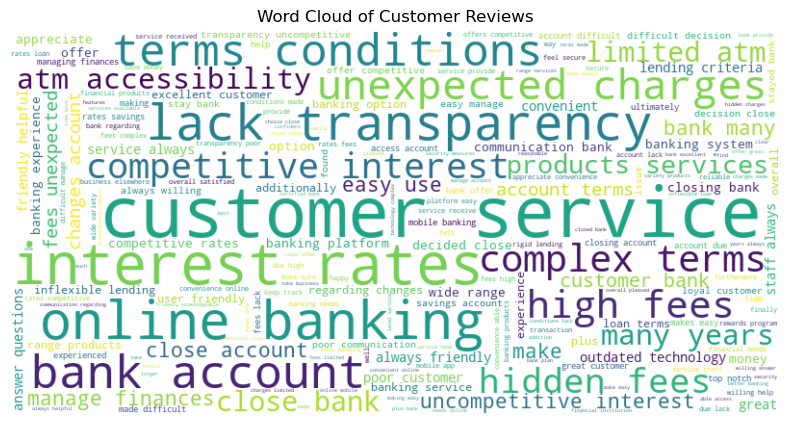

In [12]:
from pyspark.sql.functions import explode, split, col
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pyspark.ml.feature import StopWordsRemover

reviews_text = " ".join(review['CustomerFeedback'] for review in df_spark.select('CustomerFeedback').collect())

# Convert the reviews text to lowercase
reviews_text_lower = reviews_text.lower()
# Create a list of words
words = reviews_text_lower.split()
# Load English stopwords
stopwords = set(StopWordsRemover().getStopWords())
# Remove stopwords from the list of words
filtered_words = [word for word in words if word not in stopwords]
# Join the filtered words back into a single string
filtered_reviews_text = " ".join(filtered_words)
# Generate WordCloud with stopwords removed
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_reviews_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()



#### Sentiment analysis pie chart 
A Sentiment Analysis Pie Chart is a visual representation of sentiment categories (such as positive, negative, and neutral) derived from analyzing text data. It displays the distribution of sentiments within the dataset, typically using a circular chart where each segment represents a sentiment category and its size reflects the proportion of text data assigned to that sentiment category.

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 36, Finished, Available)

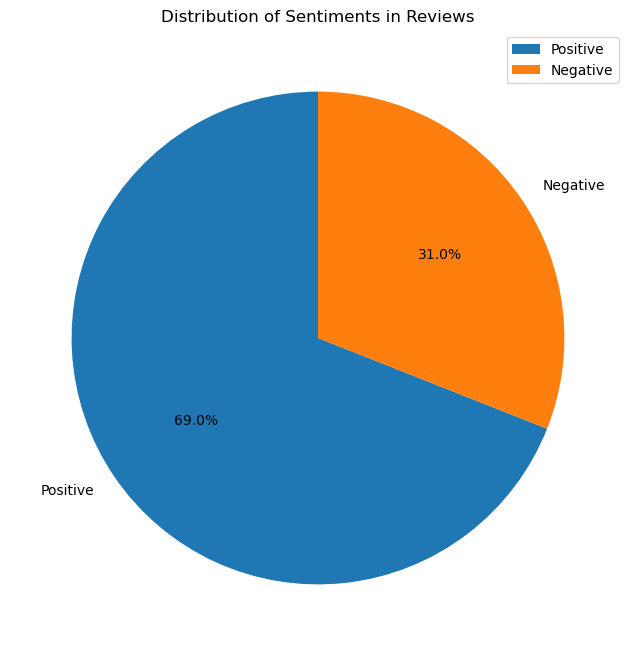

In [13]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from textblob import TextBlob

# Define a UDF for sentiment analysis using TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Register UDF
sentiment_udf = udf(get_sentiment, StringType())

# Apply sentiment analysis to each review
df_with_sentiment = df_spark.withColumn('sentiment', sentiment_udf('CustomerFeedback'))

# Calculate count of each sentiment category
sentiment_counts = df_with_sentiment.groupBy('sentiment').count()

# Convert to Pandas DataFrame for plotting
sentiment_counts_pd = sentiment_counts.toPandas()

# Plotting
sentiment_counts_pd.plot(kind='pie', y='count', labels=sentiment_counts_pd['sentiment'],
                         autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.ylabel('')
plt.title('Distribution of Sentiments in Reviews')
plt.show()


## Step 4: Utilize Azure AI Services in Fabric

Leverage Azure AI services for various tasks including:

- Translate the customer comments and feedback to another language of your choice such as French and German.
- Perform sentiment analysis on customer comments and feedback.

In [14]:
# Translate to German and French and Spanish
from synapse.ml.services.translate import Translate
from pyspark.sql.functions import col, flatten

translate = (Translate()
    .setTextCol("CustomerFeedback")
    .setToLanguage(["de", "fr", "es"])
    .setOutputCol("translation")
    .setConcurrency(5))

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 37, Finished, Available)

In [15]:
# Perform sentiment analysis
from synapse.ml.services.language import AnalyzeText

sentiment_analysis_model = (
    AnalyzeText()
    .setKind("SentimentAnalysis")
    .setTextCol("CustomerFeedback")
    .setOutputCol("sentiment_analysis")
    .setErrorCol("error")
)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 38, Finished, Available)

### Demonstrate the model performance

Create a small sample of the spark DataFrame to validate the performance.

In [16]:
# Create a sample DataFrame
df_sample = df_spark.sample(False, 0.2, seed=0).limit(30)
display(df_sample)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 39, Finished, Available)

SynapseWidget(Synapse.DataFrame, 8b5d3007-9cee-4891-8605-1ed7969135b2)

In [17]:
# Perform translation and flatten the translation results
df_translation_result = translate.transform(df_sample)\
    .withColumn("translation", explode(col("translation.translations")))
# Extract translated text into separate columns for German, French, and Spanish
df_translation_result = df_translation_result\
    .withColumn("CustomerFeedback_German", col("translation.text").getItem(0))\
    .withColumn("CustomerFeedback_French", col("translation.text").getItem(1))\
    .withColumn("CustomerFeedback_Spanish", col("translation.text").getItem(2))\
    .select("CustomerFeedback", "CustomerFeedback_German", "CustomerFeedback_French", "CustomerFeedback_Spanish")
# Display the original feedback and translations
display(df_translation_result)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 40, Finished, Available)

SynapseWidget(Synapse.DataFrame, 3b4bd8f5-1048-41db-a610-c1113bfcae95)

In [18]:
# Perform sentiment analysis
df_sentiment_results = sentiment_analysis_model.transform(df_sample)
# Display the original feedback and the sentiment analysis
display(df_sentiment_results.select("CustomerFeedback", "sentiment_analysis.documents.sentiment"))

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 41, Finished, Available)

## Step 6: Create the LLM model

Leverage SynapseML and LangChain to initialize a conversational agent that utilizes the specified OpenAI GPT-3.5 model hosted on Azure to categorize customer feedbacks.

In [19]:
# Create a DataFrame that shows the customers who have left the bank
df_exited = df_spark.filter(df_spark['Exited'] == 1)
display(df_exited)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 42, Finished, Available)

SynapseWidget(Synapse.DataFrame, 1b6f2f98-3383-4c46-823e-569c54423d25)

In [20]:
# Create a sample DataFrame
df_sample_exited = df_exited.sample(False, 0.2, seed=0).limit(30)
display(df_sample_exited)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 43, Finished, Available)

SynapseWidget(Synapse.DataFrame, af4f8f2a-0b82-4f8c-be84-2d675df815c2)

In [21]:
llm = AzureChatOpenAI(
    deployment_name='gpt-35-turbo',
    model_name='gpt-35-turbo',
    temperature=0.1,
    verbose=False,
)

template = """
    Your job is to summarize reasons by simple phrases why customer closes the bank account.
    Please use all information available in the dataset to determine only two reasons as if this is going to mentioned to the bank manager.
    Provide multiple reasons separated by a comma if multiple reasons are approprate.
    If you are unsure or a reason cannot be determined, say "Unknown".
    Write the reason as a single word or short phrase.
    Examples:
    I recently closed my bank account due to the lack of transparency and uncompetitive interest rates: High interest rates,
    After dealing with increasing fees, hidden charges, and lack of transparency, I made the decision to close my bank account: Hidden bank charges, increasing bank fees """

system_message = SystemMessage(content=template)
human_template= "{text}"
human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)
chat_prompt = ChatPromptTemplate.from_messages([system_message, human_message_prompt])
chain = LLMChain(llm=llm, prompt=chat_prompt)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 44, Finished, Available)

In [22]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from synapse.ml.services.langchain import LangchainTransformer

transformer = (
    LangchainTransformer()
    .setInputCol("CustomerFeedback")
    .setOutputCol("Customer_Reason")
    .setChain(chain)
)
display(transformer.transform(df_sample_exited))

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 45, Finished, Available)

SynapseWidget(Synapse.DataFrame, 7be4fd09-fc9c-4471-a138-660848b2cf3c)

# Step 7: Perform Q&A on the DataFrame

Leverage SynapseML integration with OpenAI Chat Completion API to perform simple Q&A on the data using the specified OpenAI GPT-3.5 model hosted on Azure.

You will define a function that takes a DataFrame, a prompt template with placeholders, and the name for the new column that will be added as the prompt column to the DataFrame. The goal is to replace the placeholders in the template with column values from the DataFrame and adds a new column with resulting values to the DataFrame.

In [23]:
import pyspark.sql.functions as F
from pyspark.sql import Row
from pyspark.sql.types import *
import re

def create_prompt_column(df, prompt, new_col):
    # Use regular expression to extract all the placeholders in the prompt string
    placeholders = re.findall(r'\{(.*?)\}', prompt)
    # Initialize the format expression with the template where placeholders are replaced by "%s"
    format_expr = prompt
    # A loop iterating over each placeholder in the prompt string
    for placeholder in placeholders:
        # Construct the dynamic expression to replace placeholders with column values
        format_expr = format_expr.replace(f"{{{placeholder}}}", "%s")
    # Construct comma-separated string of column names corresponding to the placeholders in the prompt string
    format_args = ", ".join([f"`{col}`" for col in placeholders])
    # Construct the final expression for Spark SQL by replacing using the column values provided in format_args
    expr_string = f"format_string('{format_expr}', {format_args})"
    # Create a new column
    df = df.withColumn(new_col, F.expr(expr_string))
    return df

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 46, Finished, Available)

You will define another function that leverages SynapseML integration with OpenAI chat completion API to perform chat completion based on input questions. It then stores the results in a new column of the DataFrame. Note that the `create_prompt_column` function defined above provides the necessary prompts for interacting with OpenAI.

In [24]:
from synapse.ml.services.openai import OpenAIChatCompletion

def ask_gpt(df, question, new_col, show_errors=False):
    # Instantiate OpenAIChatCompletion object and configure settings
    chat_completion = (
        OpenAIChatCompletion()
        .setDeploymentName("gpt-35-turbo")
        .setMessagesCol("messages")
        .setErrorCol("errors")
        .setOutputCol("chat_completions")
    )
    # Generate prompts for the OpenAI model based on the input DataFrame and the question
    # The create_prompt_column function defined above is used to create a new column named "prompt" in the DataFrame df 
    prompt_df = create_prompt_column(df, question, "prompt") \
        .withColumn(
            "messages",
            F.array(F.struct(
                F.lit("user").alias("role"),
                F.col("prompt").alias("content"),
                F.lit("user").alias("name"),
            ))
        )
    # Perform chat completion using the OpenAI specified model and extract the completion result and assign it to the new column
    # Drop unnecessary columns such as "prompt", "chat_completions", and "messages" from the DataFrame
    results = (chat_completion
        .transform(prompt_df)
        .withColumn(new_col, F.col("chat_completions.choices").getItem(0).getItem("message").getItem("content"))
        .drop("prompt", "chat_completions", "messages"))
    if show_errors:
        return results
    else:
        return results.drop("errors")

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 47, Finished, Available)

### Determine whether a customer feedback is positive or negative 

In [25]:
df_sample_gpt= ask_gpt(df_sample, "Is this a positive customer feedback: {CustomerFeedback}? Answer just \"true\" or \"false\"", "PositiveCustomerFeedback")
display(df_sample_gpt)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 48, Finished, Available)

SynapseWidget(Synapse.DataFrame, 160f8d7a-ac80-4b60-91f6-8c0ad99487b7)

### Determine whether a customer credit score is good or not 

In [26]:
df_sample_gpt= ask_gpt(df_sample, "Is this a good credit score: {CreditScore}? Answer just \"true\" or \"false\"", "GoodCreditScore")
display(df_sample_gpt)

StatementMeta(, 0baebffb-4cd7-467f-8a69-b700b7feb504, 49, Finished, Available)

SynapseWidget(Synapse.DataFrame, b914a947-2fcf-4d25-9136-4546fd4cf224)

## Excercise

You want to understand the average sentiment for different geographies. 

Use the tools you have learned about, e.g., copilot, data wrangler, LLM programming, etc. to help answer this question.